In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
print("DONE")

Using TensorFlow backend.


DONE


In [2]:
#from keras.datasets import cifar100

#(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

from keras.datasets import cifar100
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()
print("DONE")

169009152/169001437 [==============================] - 23s 0us/step
DONE


In [3]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("DONE")

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  100
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
DONE


DONE


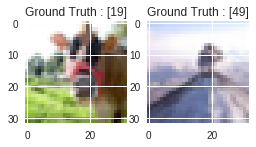

In [4]:
plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))
print("DONE")

In [5]:
# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data  = test_images.reshape (test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
print("DONE")

DONE


In [6]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])
print("DONE")

Original label 0 :  [19]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
DONE


In [7]:
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    print("DONE")

DONE


In [8]:
model.summary()
print("DONE")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [8]:
batch_size = 256
epochs = 25
print("DONE")


DONE


In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
print("DONE")

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 13s 266us/step - loss: 4.3713 - acc: 0.0328 - val_loss: 4.0776 - val_acc: 0.0580
Epoch 2/25
50000/50000 [==============================] - 11s 221us/step - loss: 4.0448 - acc: 0.0713 - val_loss: 3.7803 - val_acc: 0.1140
Epoch 3/25
10240/50000 [=====>........................] - ETA: 8s - loss: 3.8719 - acc: 0.1004

50000/50000 [==============================] - 11s 218us/step - loss: 3.7810 - acc: 0.1165 - val_loss: 3.6732 - val_acc: 0.1444
Epoch 4/25
50000/50000 [==============================] - 11s 216us/step - loss: 3.5926 - acc: 0.1465 - val_loss: 3.5332 - val_acc: 0.1590
Epoch 5/25
32768/50000 [==================>...........] - ETA: 3s - loss: 3.4523 - acc: 0.1691

50000/50000 [==============================] - 11s 218us/step - loss: 3.4416 - acc: 0.1728 - val_loss: 3.2518 - val_acc: 0.2117
Epoch 6/25
50000/50000 [==============================] - 11s 217us/step - loss: 3.3074 - acc: 0.1965 - val_loss: 3.0876 - val_acc: 0.2457
Epoch 7/25
37120/50000 [=====================>........] - ETA: 2s - loss: 3.2081 - acc: 0.2147

50000/50000 [==============================] - 11s 217us/step - loss: 3.1938 - acc: 0.2179 - val_loss: 3.0000 - val_acc: 0.2675
Epoch 8/25
50000/50000 [==============================] - 11s 215us/step - loss: 3.1007 - acc: 0.2372 - val_loss: 2.8638 - val_acc: 0.2868
Epoch 9/25
38144/50000 [=====================>........] - ETA: 2s - loss: 3.0188 - acc: 0.2503

50000/50000 [==============================] - 11s 217us/step - loss: 3.0115 - acc: 0.2511 - val_loss: 2.7911 - val_acc: 0.2996
Epoch 10/25
50000/50000 [==============================] - 11s 217us/step - loss: 2.9318 - acc: 0.2699 - val_loss: 2.8182 - val_acc: 0.2992
Epoch 11/25
38400/50000 [======================>.......] - ETA: 2s - loss: 2.8619 - acc: 0.2821

50000/50000 [==============================] - 11s 218us/step - loss: 2.8588 - acc: 0.2816 - val_loss: 2.8661 - val_acc: 0.2881
Epoch 12/25
50000/50000 [==============================] - 11s 216us/step - loss: 2.8002 - acc: 0.2913 - val_loss: 2.7970 - val_acc: 0.2982
Epoch 13/25
37888/50000 [=====================>........] - ETA: 2s - loss: 2.7450 - acc: 0.3046

50000/50000 [==============================] - 11s 216us/step - loss: 2.7492 - acc: 0.3040 - val_loss: 2.7522 - val_acc: 0.3092
Epoch 14/25
50000/50000 [==============================] - 11s 221us/step - loss: 2.6995 - acc: 0.3102 - val_loss: 2.8008 - val_acc: 0.2957
Epoch 15/25
37632/50000 [=====================>........] - ETA: 2s - loss: 2.6429 - acc: 0.3263

50000/50000 [==============================] - 11s 217us/step - loss: 2.6429 - acc: 0.3258 - val_loss: 2.5288 - val_acc: 0.3524
Epoch 16/25
50000/50000 [==============================] - 11s 219us/step - loss: 2.5994 - acc: 0.3313 - val_loss: 2.7508 - val_acc: 0.3126
Epoch 17/25
38144/50000 [=====================>........] - ETA: 2s - loss: 2.5641 - acc: 0.3380

50000/50000 [==============================] - 11s 219us/step - loss: 2.5579 - acc: 0.3391 - val_loss: 2.5532 - val_acc: 0.3499
Epoch 18/25
50000/50000 [==============================] - 11s 216us/step - loss: 2.5197 - acc: 0.3500 - val_loss: 2.5953 - val_acc: 0.3424
Epoch 19/25
38144/50000 [=====================>........] - ETA: 2s - loss: 2.4911 - acc: 0.3530

50000/50000 [==============================] - 11s 218us/step - loss: 2.4897 - acc: 0.3533 - val_loss: 2.3926 - val_acc: 0.3809
Epoch 20/25
50000/50000 [==============================] - 11s 218us/step - loss: 2.4517 - acc: 0.3586 - val_loss: 2.3694 - val_acc: 0.3834
Epoch 21/25
37632/50000 [=====================>........] - ETA: 2s - loss: 2.4280 - acc: 0.3645

50000/50000 [==============================] - 11s 218us/step - loss: 2.4312 - acc: 0.3637 - val_loss: 2.3401 - val_acc: 0.3946
Epoch 22/25
50000/50000 [==============================] - 11s 217us/step - loss: 2.3969 - acc: 0.3721 - val_loss: 2.3321 - val_acc: 0.3944
Epoch 23/25
39424/50000 [======================>.......] - ETA: 2s - loss: 2.3543 - acc: 0.3809

50000/50000 [==============================] - 11s 217us/step - loss: 2.3622 - acc: 0.3783 - val_loss: 2.3827 - val_acc: 0.3880
Epoch 24/25
50000/50000 [==============================] - 11s 216us/step - loss: 2.3526 - acc: 0.3827 - val_loss: 2.3132 - val_acc: 0.3956
Epoch 25/25
38656/50000 [======================>.......] - ETA: 2s - loss: 2.3287 - acc: 0.3871

50000/50000 [==============================] - 11s 218us/step - loss: 2.3266 - acc: 0.3875 - val_loss: 2.4285 - val_acc: 0.3773
DONE


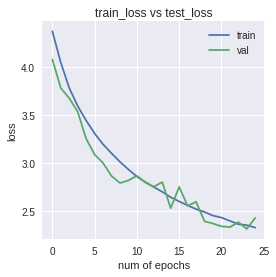

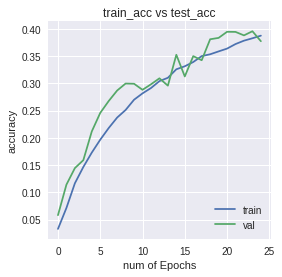

In [10]:
# Graph losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(epochs)

##############################################
plt.figure(1,figsize=(4,4))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)

plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.title('train_loss vs test_loss')

plt.grid(True)
plt.legend(['train','val']) 

##################################################

plt.figure(2,figsize=(4,4))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)

plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs test_acc')

plt.grid(True)
plt.legend(['train','val'],loc=4)

In [11]:
vgg16_model = keras.applications.vgg16.VGG16()
print("DONE")

553467904/553467096 [==============================] - 6s 0us/step
DONE


In [0]:
vgg16_model.summary()
print("DONE")

In [12]:
type(vgg16_model)

keras.engine.training.Model

In [13]:
model1= Sequential()
for layer in vgg16_model.layers:
    model1.add(layer)
print("DONE")

DONE


In [0]:
model1.summary()
print("DONE")

In [14]:
for layer in model1.layers: ## MAking trainable= FALSE (FREEZING)
    layer.trainable = False
print("DONE")

DONE


In [15]:
model1.add(Dense(100, activation='softmax'))
print("DoNE")

DoNE


In [16]:
model1.summary()
print('DONE')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [19]:
epochs1 = 10
print("DONE")

DONE


In [20]:
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs1, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
print("DONE")

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 219us/step - loss: 2.2010 - acc: 0.4155 - val_loss: 2.2450 - val_acc: 0.4169
Epoch 2/10
50000/50000 [==============================] - 11s 217us/step - loss: 2.1949 - acc: 0.4169 - val_loss: 2.1846 - val_acc: 0.4255
Epoch 3/10
11520/50000 [=====>........................] - ETA: 7s - loss: 2.1728 - acc: 0.4157

50000/50000 [==============================] - 11s 219us/step - loss: 2.1750 - acc: 0.4203 - val_loss: 2.2224 - val_acc: 0.4223
Epoch 4/10
50000/50000 [==============================] - 11s 228us/step - loss: 2.1510 - acc: 0.4250 - val_loss: 2.2113 - val_acc: 0.4219
Epoch 5/10
31232/50000 [=================>............] - ETA: 4s - loss: 2.1392 - acc: 0.4266

50000/50000 [==============================] - 11s 228us/step - loss: 2.1429 - acc: 0.4266 - val_loss: 2.2021 - val_acc: 0.4237
Epoch 6/10
50000/50000 [==============================] - 11s 225us/step - loss: 2.1355 - acc: 0.4251 - val_loss: 2.2414 - val_acc: 0.4178
Epoch 7/10
36096/50000 [====================>.........] - ETA: 2s - loss: 2.1151 - acc: 0.4343

50000/50000 [==============================] - 11s 226us/step - loss: 2.1237 - acc: 0.4320 - val_loss: 2.1999 - val_acc: 0.4216
Epoch 8/10
50000/50000 [==============================] - 11s 226us/step - loss: 2.1093 - acc: 0.4371 - val_loss: 2.2223 - val_acc: 0.4248
Epoch 9/10
36608/50000 [====================>.........] - ETA: 2s - loss: 2.0955 - acc: 0.4402

50000/50000 [==============================] - 11s 226us/step - loss: 2.1025 - acc: 0.4378 - val_loss: 2.2173 - val_acc: 0.4269
Epoch 10/10
50000/50000 [==============================] - 11s 225us/step - loss: 2.0849 - acc: 0.4417 - val_loss: 2.1822 - val_acc: 0.4332
DONE


In [31]:
vgg19_model = keras.applications.vgg19.VGG19()
print("DONE")

DONE


In [32]:
vgg19_model.summary()
print("DONE")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [33]:
type(vgg19_model)

keras.engine.training.Model

In [34]:
model2= Sequential()
for layer in vgg19_model.layers:
    model2.add(layer)
print("DONE")

DONE


In [35]:
model2.summary()
print("DONE")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [36]:
for layer in model2.layers: ## MAking trainable= FALSE (FREEZING)
    layer.trainable = False
print("DONE")

DONE


In [37]:
model2.add(Dense(100, activation='softmax'))
print("DoNE")

DoNE


In [38]:
model2.summary()
print('DONE')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [39]:
epochs2 = 10
print("DONE")

DONE


In [41]:
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs2, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
print("DONE")

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 217us/step - loss: 1.9924 - acc: 0.4610 - val_loss: 2.2983 - val_acc: 0.4224
Epoch 2/10
50000/50000 [==============================] - 11s 216us/step - loss: 1.9892 - acc: 0.4631 - val_loss: 2.1075 - val_acc: 0.4520
Epoch 3/10
13056/50000 [======>.......................] - ETA: 7s - loss: 1.9516 - acc: 0.4706

50000/50000 [==============================] - 11s 216us/step - loss: 1.9834 - acc: 0.4617 - val_loss: 2.0315 - val_acc: 0.4683
Epoch 4/10
50000/50000 [==============================] - 11s 216us/step - loss: 1.9806 - acc: 0.4618 - val_loss: 2.0376 - val_acc: 0.4607
Epoch 5/10
34560/50000 [===================>..........] - ETA: 3s - loss: 1.9753 - acc: 0.4626

50000/50000 [==============================] - 11s 216us/step - loss: 1.9770 - acc: 0.4630 - val_loss: 2.1119 - val_acc: 0.4490
Epoch 6/10
50000/50000 [==============================] - 11s 222us/step - loss: 1.9642 - acc: 0.4675 - val_loss: 2.0437 - val_acc: 0.4626
Epoch 7/10
36864/50000 [=====================>........] - ETA: 2s - loss: 1.9525 - acc: 0.4668

50000/50000 [==============================] - 11s 227us/step - loss: 1.9599 - acc: 0.4666 - val_loss: 2.1125 - val_acc: 0.4520
Epoch 8/10
50000/50000 [==============================] - 11s 227us/step - loss: 1.9592 - acc: 0.4673 - val_loss: 2.0906 - val_acc: 0.4542
Epoch 9/10
37632/50000 [=====================>........] - ETA: 2s - loss: 1.9465 - acc: 0.4750

50000/50000 [==============================] - 11s 219us/step - loss: 1.9520 - acc: 0.4719 - val_loss: 2.0076 - val_acc: 0.4719
Epoch 10/10
50000/50000 [==============================] - 11s 216us/step - loss: 1.9521 - acc: 0.4708 - val_loss: 2.0203 - val_acc: 0.4696
DONE


In [42]:
mobilenet_model = keras.applications.mobilenet.MobileNet()
print("DONE")

17227776/17225924 [==============================] - 1s 0us/step
DONE


In [0]:
mobilenet_model.summary()

In [43]:
type(mobilenet_model)
#print("DONE")

keras.engine.training.Model

In [44]:
model3= Sequential()
for layer in mobilenet_model.layers:
    model3.add(layer)
print("DONE")

DONE


In [0]:
model3.summary()

In [45]:
model3.layers.pop()
print("DONE")

DONE


In [0]:
model3.summary()
print("DOne")

In [46]:
for layer in model3.layers: ## MAking trainable= FALSE (FREEZING)
    layer.trainable = False
print("DONE")

DONE


In [47]:
model3.add(Dense(100, activation='softmax'))
print("DoNE")

DoNE


In [0]:
model3.summary()
print('DONE')

In [48]:
epochs3 = 10
print("DONE")

DONE


In [49]:
model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs3, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
print("DONE")

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 12s 234us/step - loss: 1.9447 - acc: 0.4684 - val_loss: 2.1558 - val_acc: 0.4510
Epoch 2/10
50000/50000 [==============================] - 11s 229us/step - loss: 1.9440 - acc: 0.4720 - val_loss: 2.0479 - val_acc: 0.4629
Epoch 3/10
10240/50000 [=====>........................] - ETA: 8s - loss: 1.9277 - acc: 0.4718

50000/50000 [==============================] - 11s 221us/step - loss: 1.9328 - acc: 0.4712 - val_loss: 2.0967 - val_acc: 0.4558
Epoch 4/10
50000/50000 [==============================] - 11s 216us/step - loss: 1.9289 - acc: 0.4754 - val_loss: 2.0681 - val_acc: 0.4628
Epoch 5/10
32256/50000 [==================>...........] - ETA: 3s - loss: 1.9177 - acc: 0.4764

50000/50000 [==============================] - 11s 216us/step - loss: 1.9281 - acc: 0.4740 - val_loss: 2.0435 - val_acc: 0.4710
Epoch 6/10
50000/50000 [==============================] - 11s 216us/step - loss: 1.9294 - acc: 0.4747 - val_loss: 2.0854 - val_acc: 0.4597
Epoch 7/10
38400/50000 [======================>.......] - ETA: 2s - loss: 1.9221 - acc: 0.4790

50000/50000 [==============================] - 11s 217us/step - loss: 1.9245 - acc: 0.4767 - val_loss: 2.0177 - val_acc: 0.4703
Epoch 8/10
50000/50000 [==============================] - 11s 217us/step - loss: 1.9231 - acc: 0.4760 - val_loss: 2.1242 - val_acc: 0.4556
Epoch 9/10
38144/50000 [=====================>........] - ETA: 2s - loss: 1.9126 - acc: 0.4769

50000/50000 [==============================] - 11s 218us/step - loss: 1.9201 - acc: 0.4761 - val_loss: 2.0470 - val_acc: 0.4644
Epoch 10/10
50000/50000 [==============================] - 11s 217us/step - loss: 1.9172 - acc: 0.4786 - val_loss: 2.1601 - val_acc: 0.4532
DONE
